In [64]:
from funcs import *
import numpy as np
import pickle
def overlap(amps_dict_1, amps_dict_2, n):
    # return np.abs(np.vdot(list(amps_dict_1.values()), list(amps_dict_2.values())))**2
    s_list = []
    for i in range(2**n):
        s = np.array([int(x) for x in list(np.binary_repr(i, width=n))])
        s_list.append(s)
    fidelity = 0
    for s in s_list:
        fidelity += np.conj(amps_dict_1[tuple(s)])*amps_dict_2[tuple(s)]
    return np.abs(fidelity)**2

import re

def extract_depth_entropy(data, total_depth, chi=-1):
    depth_entropy = []
    # depth_entropy.append((0, 0))
    depth_set = set()
    for line in data:
        # chi can be negative
        chi_pattern = re.compile(r'chi=(\-?\d+)')
        chi_line = int(chi_pattern.findall(line)[0])
        if chi_line == chi:
            depth_pattern = re.compile(r'depth=(\d+)')
            depth = int(depth_pattern.findall(line)[0])
            if depth > total_depth:
                break
            # S_A can be in scientific notation
            S_A_pattern = re.compile(r'S_A=(\-?\d+\.\d+e\-\d+|\-?\d+\.\d+)')
            # S_A_pattern = re.compile(r'S_A=(\-?\d+\.\d+)')
            S_A = float(S_A_pattern.findall(line)[0])
            # append only if the depth is not already in the list somewhere
            if depth not in depth_set:
                depth_entropy.append((depth, S_A))
            depth_set.add(depth)
    return depth_entropy

In [70]:
tn_func_chi = 2
chi = 2
n = 8
J = g = np.pi/4
h  = 0.5
total_depth = 10
depth_list = list(range(1, total_depth+1))
tnfunc_depth_overlap = {}
tnfunc_xmax_depth_overlap = {}
mps_depth_overlap = {}
for depth in depth_list:
    amps_exact,_ = amplitudes_exact(n, depth=depth, J=J, g=g, h=h)
    amps_MPS,_ = amplitudes(n, depth=depth, chi=chi, direction='xmin', J=J, g=g, h=h)
    amps_tnfunc = pickle.load(open(f'./results/amplitude_dict/amplitude_dict_n={n}_J={J}_g={g}_h={h}_depth={depth}_chi={tn_func_chi}_tnfunc.pkl', 'rb'))
    try:
        tnfunc_depth_overlap[depth] = overlap(amps_exact, amps_tnfunc, n)
        mps_depth_overlap[depth] = overlap(amps_exact, amps_MPS, n)
    except:
        pass
    
    try:
        amps_tnfunc_xmax = pickle.load(open(f'./results/amplitude_dict/amplitude_dict_n={n}_J={J}_g={g}_h={h}_depth={depth}_chi={tn_func_chi}_tnfunc_xmax.pkl', 'rb'))
        tnfunc_xmax_depth_overlap[depth] = overlap(amps_exact, amps_tnfunc_xmax, n)
    except:
        print('no xmax')
        pass


Exact simulation normalization: 1.00
Exact amplitudes computation time: 0.01 s, depth=1


100%|##########| 256/256 [00:00<00:00, 17798.99it/s]


Amplitudes computation time: 0.01 s, depth=1
Exact simulation normalization: 1.00
Exact amplitudes computation time: 0.01 s, depth=2


100%|##########| 256/256 [00:00<00:00, 18589.07it/s]


Amplitudes computation time: 0.01 s, depth=2
Exact simulation normalization: 1.00
Exact amplitudes computation time: 0.01 s, depth=3


100%|##########| 256/256 [00:00<00:00, 18249.74it/s]

Amplitudes computation time: 0.01 s, depth=3
Exact simulation normalization: 1.00
Exact amplitudes computation time: 0.01 s, depth=4



100%|##########| 256/256 [00:00<00:00, 14850.38it/s]


Amplitudes computation time: 0.02 s, depth=4
Exact simulation normalization: 1.00
Exact amplitudes computation time: 0.01 s, depth=5


100%|##########| 256/256 [00:00<00:00, 18237.03it/s]


Amplitudes computation time: 0.01 s, depth=5
Exact simulation normalization: 1.00
Exact amplitudes computation time: 0.01 s, depth=6


100%|##########| 256/256 [00:00<00:00, 16101.94it/s]

Amplitudes computation time: 0.02 s, depth=6


Exact simulation normalization: 1.00
Exact amplitudes computation time: 0.01 s, depth=7


100%|##########| 256/256 [00:00<00:00, 17592.52it/s]


Amplitudes computation time: 0.01 s, depth=7
Exact simulation normalization: 1.00
Exact amplitudes computation time: 0.03 s, depth=8


100%|##########| 256/256 [00:00<00:00, 15420.90it/s]

Amplitudes computation time: 0.02 s, depth=8
Exact simulation normalization: 1.00
Exact amplitudes computation time: 0.01 s, depth=9



100%|##########| 256/256 [00:00<00:00, 17743.11it/s]


Amplitudes computation time: 0.01 s, depth=9
Exact simulation normalization: 1.00
Exact amplitudes computation time: 0.02 s, depth=10


100%|##########| 256/256 [00:00<00:00, 18515.02it/s]

Amplitudes computation time: 0.01 s, depth=10


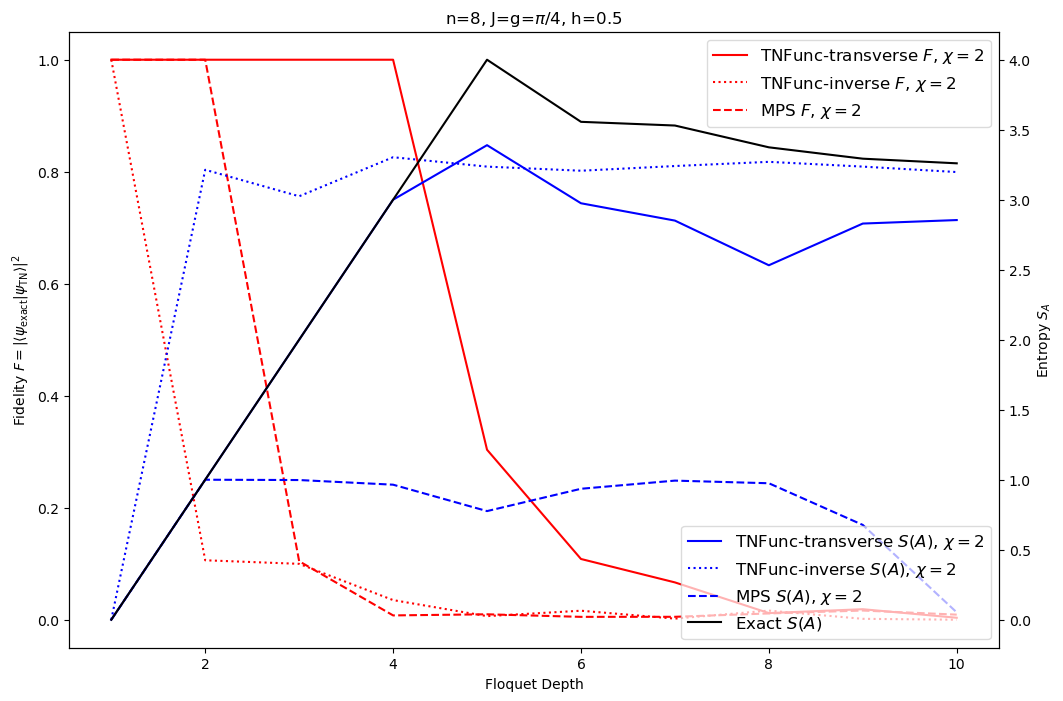

In [71]:
import matplotlib.pyplot as plt

TNfunc_y_file = open(f'./results/TNfunc_y_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_file = open(f'./results/TNfunc_n={n}_J={J}_g={g}_h={h}.txt', 'r')
exact_file = open(f'./results/exact_n={n}_J={J}_g={g}_h={h}.txt', 'r')
mps_file = open(f'./results/MPS_n={n}_J={J}_g={g}_h={h}.txt', 'r')
TNfunc_y_data = TNfunc_y_file.readlines()
TNfunc_data = TNfunc_file.readlines()
exact_data = exact_file.readlines()
mps_data = mps_file.readlines()

TNfunc_y_depth_entropy = extract_depth_entropy(TNfunc_y_data, total_depth, chi=tn_func_chi)
TNfunc_y_depth_entropy.sort(key=lambda x: x[0])
depth, S_A_tnfunc = zip(*TNfunc_y_depth_entropy)

try:
    TNfunc_depth_entropy = extract_depth_entropy(TNfunc_data, total_depth, chi=tn_func_chi)
    TNfunc_depth_entropy.sort(key=lambda x: x[0])
    depth, S_A_tnfunc_xmax = zip(*TNfunc_depth_entropy)
except:
    print('No xmax data1')

mps_depth_entropy = extract_depth_entropy(mps_data, total_depth, chi=chi)
mps_depth_entropy.sort(key=lambda x: x[0])
depth, S_A_mps = zip(*mps_depth_entropy)

exact_depth_entropy = extract_depth_entropy(exact_data, total_depth)
exact_depth_entropy.sort(key=lambda x: x[0])
depth, S_A_exact = zip(*exact_depth_entropy)

fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(depth_list, list(tnfunc_depth_overlap.values()), label=f'TNFunc-transverse $F$, $\chi={tn_func_chi}$', linestyle='-', color='red')
try:
    ax.plot(depth_list, list(tnfunc_xmax_depth_overlap.values()), label=f'TNFunc-inverse $F$, $\chi={tn_func_chi}$', linestyle=':', color='red')
except:
    pass
ax.plot(depth_list, list(mps_depth_overlap.values()), label=f'MPS $F$, $\chi={chi}$', linestyle='--', color='red')
ax.set_xlabel('Floquet Depth')
ax.set_ylabel(r'Fidelity $F=|\langle \psi_{\mathrm{exact}} | \psi_{\mathrm{TN}} \rangle|^2$')


ax.set_title(f'n={n}, J=g=$\pi/4$, h={h}')

ax1 = ax.twinx()

ax1.plot(depth, S_A_tnfunc, label=f'TNFunc-transverse $S(A)$, $\chi={tn_func_chi}$', color='blue', linestyle='-')
try:
    ax1.plot(depth, S_A_tnfunc_xmax, label=f'TNFunc-inverse $S(A)$, $\chi={tn_func_chi}$', color='blue', linestyle=':')
except:
    print('No xmax data2')
ax1.plot(depth, S_A_mps, label=f'MPS $S(A)$, $\chi={chi}$', color='blue', linestyle='--')
ax1.plot(depth, S_A_exact, label='Exact $S(A)$', color='black', linestyle='-')
ax1.set_xlabel('Floquet Depth')
ax1.set_ylabel(r'Entropy $S_A$')
leg1 = ax.legend(loc='upper right', fontsize=12, framealpha=0.7)
leg2 = ax1.legend(loc='lower right', fontsize=12, framealpha=0.7)



plt.savefig(f'./results/fidelity_entropy_n={n}_J={J}_g={g}_h={h}_chi={tn_func_chi}.png', dpi=300)
plt.show()
